In [364]:
import tensorflow as tf
import numpy as np
import pandas as pd
import time
import datetime
import matplotlib.pyplot as plt
import warnings
%matplotlib inline

In [365]:
if tf.test.gpu_device_name():
    print('Default GPU {}'.format(tf.test.gpu_device_name()))
else:    
    print('NO GPU DETECTED')
    

Default GPU /gpu:0


In [366]:
data = pd.read_csv("data/test.txt", header=None, names=['id', 'application', 'gender', 'price'])
data.head()

,id,application,gender,price
0,1,3on3publishing.MummysClub,books,990
1,2,com.288vroom.poeiphone,books,990
2,3,com.3ight.LoveQuotesiPhone,books,0
3,4,com.amazon.Lassen,books,0
4,5,com.appbooks.animalia,books,2990


In [367]:
data_loc = pd.read_csv("data/traces/accel/accel.txt", header=None, names=['id','time_p', 'x', 'y', 'z'])
data_loc.head()

,id,time_p,x,y,z
0,D03,1283889270,-0.036224,0.000000,-1.068619
1,D03,1283889270,-0.036224,0.018112,-1.050507
2,D03,1283889270,-0.036224,0.036224,-1.050507
3,D03,1283889270,-0.036224,0.018112,-1.050507
4,D03,1283889270,-0.054337,0.018112,-1.068619


In [368]:
#print(len(data_loc))

    

In [369]:
pd.options.mode.chained_assignment = None 
X = data[['id', 'application', 'gender']].values
#print()
data.insert(3, 'type', 0)

In [370]:
def get_data_app(data):
    gender = data.gender
    names = {}
    gender_name = {}
    j = 2
    k = 0
    gender_id = {}
    for i in range(len(data)):
        name = data.application[i]
        if name not in names:
            names[name] = k
            k +=1
        gender = data.gender[i]    
        if gender not in gender_id:
            gender_id[gender] = j
            j +=1
        data.type[i] = int(gender_id[gender])
        gender_name[name] = gender_id[data.gender[i]]
    return gender_id, gender, names, k, gender_name

In [371]:
gender_id, gender, name_app, id_number, gender_n = get_data_app(data)
data.head()

,id,application,gender,type,price
0,1,3on3publishing.MummysClub,books,2,990
1,2,com.288vroom.poeiphone,books,2,990
2,3,com.3ight.LoveQuotesiPhone,books,2,0
3,4,com.amazon.Lassen,books,2,0
4,5,com.appbooks.animalia,books,2,2990


In [372]:
data0 = pd.read_csv('data/traces/appusage/D03_appusage.txt', header=None, names=['id','user_id' ,'application', 'time', 'duration'])
data0.insert(3, 'gender', 0)
data0.insert( 4, 'date', 0.0)
data0.insert( 5, 'day', 0)
data0.insert( 6, 'time_24h', 0.0)
data0.insert(7, 'hour_int', 0.0)
data0.insert(8, 'min_int', 0.0)
data0.insert(9, 'sec_int', 0.0)
data0.insert(10, 'day_int', 0)
data0.insert(11, 'x', 0.0)
data0.insert(12, 'y', 0.0)
data0.insert(13, 'z', 0.0)
data0.insert(14, 'channel', 0.0)
data0.insert(14, 'rate', 0.0)
data0.insert(15, 'rssi', 0.0)



data0.head()

,id,user_id,application,gender,date,day,time_24h,hour_int,min_int,sec_int,day_int,x,y,z,rate,rssi,channel,time,duration
0,847971,D03,com.apple.Preferences,0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,1283892318,95
1,847972,D03,SpringBoard,0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,1283892413,6
2,847973,D03,SpringBoard,0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,1283901552,17
3,847974,D03,SpringBoard,0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,1283910068,12
4,847975,D03,com.apple.mobileslideshow-Camera,0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,1283910080,32


In [373]:
print(len(data0) )

33448


In [374]:
for i in range(len(data0)):
    name = data0.application[i]
    if name in gender_n:
        data0.gender[i] = gender_n[name]
    else:
        data0.gender[i] = 1
        
data0.gender[309:].head()

309    17
310     1
311     1
312     1
313    17
Name: gender, dtype: int64

In [375]:
data_power = pd.read_csv("data/traces/power/power.txt", header=None, names=['id', 'user_id', 'time', 'battery', 'mah', 'current', 'charging', 'charged'])
data0.insert(11, 'power', 0)
data0.insert(12, 'charging', 0)
data0.insert(13, 'charged', 0)


data_power.battery = [battery/100 for battery in data_power.battery]

data_power.head()

,id,user_id,time,battery,mah,current,charging,charged
0,10899805,D03,1283889274,0.26,3811,113,1,0
1,10899806,D03,1283890181,0.34,3861,268,1,0
2,10899807,D03,1283890201,0.34,3869,352,1,0
3,10899808,D03,1283890221,0.34,3870,349,1,0
4,10899809,D03,1283890241,0.34,3870,350,1,0


In [376]:
print(len(data0), len(data_power))

33448 244064


In [377]:
x_power = data_power[['time', 'battery', 'charging', 'charged']].values





In [378]:
data0.head()

,id,user_id,application,gender,date,day,time_24h,hour_int,min_int,sec_int,...,charging,charged,x,y,z,rate,rssi,channel,time,duration
0,847971,D03,com.apple.Preferences,1,0.0,0,0.0,0.0,0.0,0.0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1283892318,95
1,847972,D03,SpringBoard,1,0.0,0,0.0,0.0,0.0,0.0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1283892413,6
2,847973,D03,SpringBoard,1,0.0,0,0.0,0.0,0.0,0.0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1283901552,17
3,847974,D03,SpringBoard,1,0.0,0,0.0,0.0,0.0,0.0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1283910068,12
4,847975,D03,com.apple.mobileslideshow-Camera,1,0.0,0,0.0,0.0,0.0,0.0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1283910080,32


In [379]:
date = data0.time 
duration = data0.duration
week_dic = {'Sunday': 1, 'Monday': 2, 'Tuesday': 3, 'Wednesday': 4, 'Thursday': 5, 'Friday': 6, 'Saturday':7}

#duration = [dur for dur in duration if dur < 0 dur:0]
time_ = [datetime.datetime.fromtimestamp(d) for d in date]
time = [str(times)[11:] for times in time_]
date_ = [str(times)[:11] for times in time_]
week_day = [datetime.datetime.strptime(str(day), '%Y-%M-%d ').strftime('%A') for day in date_]

time_int = [time_string.split(':') for time_string in time]
time_int_ = [int(''.join(time_scatter)) for time_scatter in time_int]

hour_int = [int(hour[0])/100  for hour in time_int]
min_int = [int(hour[1])/100  for hour in time_int]
sec_int = [int(hour[2])/100  for hour in time_int]

data0.hour_int = hour_int
data0.min_int = min_int
data0.sec_int = sec_int


data0.day_int = [week_dic[day] for day in week_day]
data0.day = week_day
data0.time_24h = time
data0.time_int = time_int_
number_sessions = {}
time_by_app = {}
avg_app_time = {}
length = len(name_app) + 1
data0.date = date_
id_number += 1


new_ids = {}
new_id = 2

for i in range(len(data0)):
        names = data0.application[i]      
        
        
        if names not in new_ids:
            new_ids[names] = new_id
            new_id +=1
       
        if names not in number_sessions:
            number_sessions[names] = 1
            time_by_app[names] = duration[i]
        else:
            number_sessions[names] += 1
            time_by_app[names] += duration[i]

data0.id = [new_ids[i] for i in data0.application]  

avg = [float(time_by_app[i])/float(number_sessions[i]) for i in time_by_app]  
j = 0
for name in number_sessions:
    avg_app_time[name] = avg[j]
    j += 1

#number_apps = len(data)    
    
data0.head()

,id,user_id,application,gender,date,day,time_24h,hour_int,min_int,sec_int,...,charging,charged,x,y,z,rate,rssi,channel,time,duration
0,2,D03,com.apple.Preferences,1,2010-09-08,Friday,05:45:18,0.05,0.45,0.18,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1283892318,95
1,3,D03,SpringBoard,1,2010-09-08,Friday,05:46:53,0.05,0.46,0.53,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1283892413,6
2,3,D03,SpringBoard,1,2010-09-08,Friday,08:19:12,0.08,0.19,0.12,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1283901552,17
3,3,D03,SpringBoard,1,2010-09-08,Friday,10:41:08,0.10,0.41,0.08,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1283910068,12
4,4,D03,com.apple.mobileslideshow-Camera,1,2010-09-08,Friday,10:41:20,0.10,0.41,0.20,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1283910080,32


In [380]:
data0.hour_int = [int(time) for time in data0.hour_int]
data0.head()

,id,user_id,application,gender,date,day,time_24h,hour_int,min_int,sec_int,...,charging,charged,x,y,z,rate,rssi,channel,time,duration
0,2,D03,com.apple.Preferences,1,2010-09-08,Friday,05:45:18,0,0.45,0.18,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1283892318,95
1,3,D03,SpringBoard,1,2010-09-08,Friday,05:46:53,0,0.46,0.53,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1283892413,6
2,3,D03,SpringBoard,1,2010-09-08,Friday,08:19:12,0,0.19,0.12,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1283901552,17
3,3,D03,SpringBoard,1,2010-09-08,Friday,10:41:08,0,0.41,0.08,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1283910068,12
4,4,D03,com.apple.mobileslideshow-Camera,1,2010-09-08,Friday,10:41:20,0,0.41,0.20,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1283910080,32


In [381]:
data_wifi = pd.read_csv("data/traces/wifi/availablewifi/wifi.txt", header=None, names=['id', 'time', 'ssid', 'bssid', 'channel', 'rate', 'rssi'])
data_wifi.rate  = [rate/100 for rate in data_wifi.rate]
data_wifi.rssi  = [-rs/100 for rs in data_wifi.rssi]
data_wifi.channel  = [ch/100 for ch in data_wifi.channel]

data_wifi.head()

,id,time,ssid,bssid,channel,rate,rssi
0,D03,2010-09-07 19:54:29,61480f2dd8b2ea4283ea321f915310b9,4a996556357f67003ddc16d40603be6b,0.11,0.48,0.69
1,D03,2010-09-07 19:54:31,61480f2dd8b2ea4283ea321f915310b9,4a996556357f67003ddc16d40603be6b,0.11,0.48,0.61
2,D03,2010-09-07 19:54:33,61480f2dd8b2ea4283ea321f915310b9,4a996556357f67003ddc16d40603be6b,0.11,0.36,0.71
3,D03,2010-09-07 19:54:35,61480f2dd8b2ea4283ea321f915310b9,4a996556357f67003ddc16d40603be6b,0.11,0.36,0.71
4,D03,2010-09-07 19:54:38,61480f2dd8b2ea4283ea321f915310b9,4a996556357f67003ddc16d40603be6b,0.11,0.18,0.67


In [382]:
data0.hour_int = [int(time) for time in data0.hour_int]
data_wi = data_wifi[['time', 'channel', 'rate', 'rssi']].values
data0.head()

,id,user_id,application,gender,date,day,time_24h,hour_int,min_int,sec_int,...,charging,charged,x,y,z,rate,rssi,channel,time,duration
0,2,D03,com.apple.Preferences,1,2010-09-08,Friday,05:45:18,0,0.45,0.18,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1283892318,95
1,3,D03,SpringBoard,1,2010-09-08,Friday,05:46:53,0,0.46,0.53,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1283892413,6
2,3,D03,SpringBoard,1,2010-09-08,Friday,08:19:12,0,0.19,0.12,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1283901552,17
3,3,D03,SpringBoard,1,2010-09-08,Friday,10:41:08,0,0.41,0.08,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1283910068,12
4,4,D03,com.apple.mobileslideshow-Camera,1,2010-09-08,Friday,10:41:20,0,0.41,0.20,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1283910080,32


In [383]:
import time as ti


x_data = data0[['time','hour_int','min_int', 'day_int' ,'power','charging', 'charged','x', 'y', 'z', 'channel', 'rate', 'rssi']].values 
y_data = data_loc[['time_p', 'x', 'y', 'z']].values

length = len(data0)
start = 0
start_time = ti.time()
for i in range(length):
    for j in range(start, len(data_loc), 1):
        if x_data[i, 0] <= y_data[j, 0] + 899:
            x_data[i, 7:10] = y_data[j, 1:]/10
            break
        else:
            start += 1

x_power = data_power[['time', 'battery', 'charging', 'charged']].values
start = 0
for i in range(length):
    for k in range(start, len(data_power), 1):
        if x_data[i, 0] <= x_power[k, 0] + 59:
            x_data[i, 4:7] = x_power[k, 1:]
            break
        else:
            start += 1 
            
            

#d = str(data_wifi.time[0])
#time_str = [str(time) for time in data_wi[:, 0]]
#print(time_str[8])
#print(len(data0), len(data_wi))
#b = datetime.datetime.strptime(data_wifi.time[0], '%Y-%m-%d %H:%M:%S')
#print(data_wi[0,0])


In [384]:
start = 0
for i in range(length):
    for k in range(start, len(data_wi), 1):
        date_time = str(data_wi[k, 0])
        str_time = datetime.datetime.strptime(date_time, '%Y-%m-%d %H:%M:%S')
        #print(str_time.timestamp())
        int_time = int(str_time.timestamp())
        if x_data[i, 0] <= int_time + 300:
            x_data[i, 10:] = data_wi[k, 1:] 
            break           
        else:
            start += 1

np.savetxt('new', x_data, delimiter=',')  


In [385]:
def load_data(data, new_data, data_):
    X = new_data[['hour_int', 'day_int' ,'power','charging', 'charged','x', 'y', 'z', 'channel','rate', 'rssi']].values
    y = data[['id']].values
    labels = data_[['id']].values
   
    return X, y, labels




In [386]:
data0.head()

,id,user_id,application,gender,date,day,time_24h,hour_int,min_int,sec_int,...,charging,charged,x,y,z,rate,rssi,channel,time,duration
0,2,D03,com.apple.Preferences,1,2010-09-08,Friday,05:45:18,0,0.45,0.18,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1283892318,95
1,3,D03,SpringBoard,1,2010-09-08,Friday,05:46:53,0,0.46,0.53,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1283892413,6
2,3,D03,SpringBoard,1,2010-09-08,Friday,08:19:12,0,0.19,0.12,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1283901552,17
3,3,D03,SpringBoard,1,2010-09-08,Friday,10:41:08,0,0.41,0.08,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1283910068,12
4,4,D03,com.apple.mobileslideshow-Camera,1,2010-09-08,Friday,10:41:20,0,0.41,0.20,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1283910080,32


In [387]:
new_data = pd.read_csv("new", header=None, names=['time','hour_int','min_int', 'day_int' ,'power','charging', 'charged','x', 'y', 'z', 'channel', 'rate', 'rssi'])
new_data.head()

,time,hour_int,min_int,day_int,power,charging,charged,x,y,z,channel,rate,rssi
0,1.283892e+09,0.0,0.45,6.0,0.27,1.0,0.0,-0.005434,0.003622,-0.117729,0.06,0.54,0.42
1,1.283892e+09,0.0,0.46,6.0,0.27,1.0,0.0,-0.005434,0.003622,-0.117729,0.06,0.54,0.42
2,1.283902e+09,0.0,0.19,6.0,0.30,0.0,0.0,0.021735,-0.041658,-0.090561,0.06,0.54,0.42
3,1.283910e+09,0.0,0.41,6.0,0.20,0.0,0.0,-0.041658,-0.021735,-0.094183,0.06,0.54,0.42
4,1.283910e+09,0.0,0.41,6.0,0.20,0.0,0.0,-0.041658,-0.021735,-0.094183,0.06,0.54,0.42


In [388]:
gender_labels = data0.gender
X, Y, labels = load_data(data0, new_data, data)

In [389]:
length = len(Y)
Y_ = np.zeros((length, new_id))

for i in range(length):
    index = Y[i]
    if index != 0:
        Y_[i][index] = 1
    
print(Y_[-1], Y[-1])

[ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.] [3]


In [390]:
print((new_id))

71


In [391]:
length = len(Y)
Y_g = np.zeros((length, np.max(gender_labels)))

for i in range(length):
    index = gender_labels[i] - 1  
    if index != 0:
        Y_g[i][index] = 1
    
        
    
print(Y_g)

[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


# Generating Sequences



In [392]:
duration = 0
spam = 0

sequence = []           #sequence of applications
seq_seq = []            #sequence of sequences
prev_id = 0             #previous id to be compared 
user_id = 0             #current user id using application
trigger_time = []       #when seq has started
Y_list = []
Y_seq = []

#X_data = [['application, ']].values
seq = 0
max_seq = 0 # maximun number of applications in a sequence
list_index = 0
length = len(data0)
for i in range(length):
    duration = int(data0.duration[i])
    time = int(data0.time[i])
    user_id = data0.user_id[i]
    Id = data0.id[i]
    dur_ = 0
    
    
    if ((time - 30 <= spam ) and (user_id == prev_id)) or i == 0:
        sequence.insert(-1, x_data[i, :])
        Y_list.insert(-1, data0.id[i])
        seq += 1                  
    else:
        
        dur = data0.duration[i - 1]
        seq_seq.append([list_index, sequence])
        Y_seq.append([list_index, Y_list])
        #append start and end time with sequence length           
        #trigger_time = []
        #trigger_time.insert(0, time)       
        spam = 0
        #starting new list
        sequence = []
        Y_list = []
        sequence.insert(0, x_data[i,:])
        Y_list.insert(0, data0.id[i])
        #triger_time = []
        #trigger_time.append(time)
        
        
        if seq > max_seq:
            max_seq = seq
            
        list_index += 1
        seq = 1
    prev_id = user_id    
    spam = duration + time
    
    

In [393]:
print(len(seq_seq),list_index, max_seq)

10703 10703 64


In [394]:
sequencesY= np.zeros((list_index, max_seq + 1, new_id))
for i, seq in Y_seq:
    k = 0
    for j in seq:
        for m in range(new_id):
            if j == m:
                sequencesY[i, k, m] = 1
        k += 1
    sequencesY[i, k, new_id - 1] = 1
    



In [421]:
sequencesY_= np.zeros((list_index, max_seq + 1))
for i, seq in Y_seq:
    k = 0
    for j in seq:
        sequencesY_[i, k] = j
        k += 1
    sequencesY_[i, k] = 1
    



In [422]:
print (sequencesY_[3])

[  4.   3.   4.   3.   6.   3.   7.   3.   8.   3.   9.   3.  10.   3.   8.
   3.  11.   3.  12.   3.   5.   3.  13.   3.   1.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.]


In [396]:
sequencesX = np.zeros((list_index, max_seq + 1, 13))

for i, seq in seq_seq:
    k = 0
    #print(seq)
    for array in seq:
        array_ = np.array(array)
        m = 0
        for element in (array_):           
            sequencesX[i, k, m] = element
            m += 1
        k += 1
    #sequencesX[i, k, m-1] = 1




In [397]:
print(sequencesX.shape)

(10703, 65, 13)


In [398]:
print (len(sequencesX))

10703


In [399]:


l = len(X)
div = l//20
div2 = div*2


#train_indices = np.random.choice(l, round(0.9*l), replace=False)
#test_indices = np.array(list(set(range(l)) - set(train_indices)))


train_indices = int(l * 0.9)
test_indices = train_indices + int((l - train_indices)/2)
#val_indices_ = l - train_indices - test_indices
#val_indices = np.array(list(test_indices))


#print(len(test_indices), len(train_indices) )
#Dividing data for testing, validation and training
X_te, Y_te = X[train_indices:test_indices], Y_[train_indices:test_indices]
X_val, Y_val = X[test_indices:], Y_[test_indices:]
X_tr, Y_tr = X[:train_indices], Y_[:train_indices]

#data info
print('X shape and Y shape                       {}, {}'.format(X.shape, Y_.shape))
print('X testing shape and Y testing shape       {}, {}'.format(X_te.shape, Y_te.shape))
print('X training shape and Y training shape     {}, {}'.format(X_tr.shape, Y_tr.shape))
print('X validation shape and Y validation shape {}, {}'.format(X_val.shape, Y_val.shape))

#print(X, Y)

X shape and Y shape                       (33448, 11), (33448, 71)
X testing shape and Y testing shape       (1672, 11), (1672, 71)
X training shape and Y training shape     (30103, 11), (30103, 71)
X validation shape and Y validation shape (1673, 11), (1673, 71)


In [400]:
x = tf.placeholder(dtype=tf.float32, shape=(None, n_steps, n_inputs), name='input')
y = tf.placeholder(dtype=tf.float32, shape=(None, n_steps, n_classes), name='label')
length = tf.placeholder()





TypeError: placeholder() missing 1 required positional argument: 'dtype'

In [423]:
tf.reset_default_graph()
sess = tf.Session()

EOS = 1
PAD = 0

learning_rate = 0.001
training_epochs = 100
batch_size = 1000
#total_batches = (train_x.shape[0]//batch_size)

n_inputs = 13
n_steps = len(sequencesX[1])
n_hidden = 256
n_classes = new_id

alpha = 0.5

In [ ]:
print(len(sequencesY))

In [424]:
#Input output
x = tf.placeholder(dtype=tf.float32, shape=(None, n_steps, n_inputs), name='input')
y = tf.placeholder(dtype=tf.float32, shape=(None, n_classes), name='label')

#Weights
weight = { 'hidden': tf.Variable(tf.random_normal([n_inputs, n_hidden])),
           'out'   : tf.Variable(tf.random_normal([n_hidden, n_classes], mean=1.0))    
}
bias={ 'hidden':  tf.Variable(tf.random_normal([n_hidden])),
        'out':    tf.Variable(tf.random_normal([n_classes]))
}

print('Number of inputs, number of classes, tensors x, y, weight and bias')
print (n_inputs, n_classes, x, y, weight, bias)


Number of inputs, number of classes, tensors x, y, weight and bias
13 71 Tensor("input:0", shape=(?, 65, 13), dtype=float32) Tensor("label:0", shape=(?, 71), dtype=float32) {'hidden': <tf.Variable 'Variable:0' shape=(13, 256) dtype=float32_ref>, 'out': <tf.Variable 'Variable_1:0' shape=(256, 71) dtype=float32_ref>} {'hidden': <tf.Variable 'Variable_2:0' shape=(256,) dtype=float32_ref>, 'out': <tf.Variable 'Variable_3:0' shape=(71,) dtype=float32_ref>}


In [425]:
print(y)

Tensor("label:0", shape=(?, 71), dtype=float32)


In [403]:
def lstm_layer(dataSet, weights, bias):
    n = int(dataSet.shape[2])
    n_steps = int(dataSet.shape[1])
    dataSet = tf.transpose(dataSet, [1, 0, 2] )
    
    dataSet = tf.reshape(dataSet, [-1, n])    
    dataSet = tf.nn.relu(tf.matmul(dataSet, weights['hidden']) + bias['hidden'] )
    
    dataSet = tf.split(dataSet, n_steps, 0)
    
    #two stacked LSTMs
    with tf.variable_scope('lstm_1', reuse=False):
        lstm_cell_1 = tf.contrib.rnn.BasicLSTMCell(n_hidden, forget_bias=1.0, state_is_tuple=True) 
    with tf.variable_scope('lstm_2', reuse=False):
        lstm_cell_2 = tf.contrib.rnn.BasicLSTMCell(n_hidden, forget_bias=1.0, state_is_tuple=True)
    with tf.variable_scope('cells', reuse=False):
        lstm_cells = tf.contrib.rnn.MultiRNNCell([lstm_cell_1, lstm_cell_2], state_is_tuple=True)
    
    #LSTM cell output
    with tf.variable_scope('outputs', reuse=True):
        outputs, _ = tf.contrib.rnn.static_rnn(lstm_cells, dataSet, dtype=tf.float32)
    
    last_layer = outputs[-1]
    result = tf.matmul(last_layer, weights['out']) + bias['out']
    return result

In [404]:
def extract_batch_size(_train, step, batch_size):
    # Function to fetch a "batch_size" amount of data from "(X|y)_train" data. 
    
    length = len(_train)
    index = np.random.choice(length - 1 , batch_size, replace=True)
    batch = _train[index] 

    return batch

In [405]:
layer = lstm_layer(x, weight, bias)


In [409]:
#loss using softmax
loss =tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=layer))
with tf.variable_scope('Adam', reuse=False):
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(loss)

#correct_bool_pred = tf.equal(tf.argmax(layer, 1), tf.argmax(y, 1))
#accuracy_ = tf.reduce_mean(tf.argmax(layer, 1)==tf.argmax(y, 1))
#accuracy = tf.reduce_mean(tf.cast(correct_bool_pred, tf.float32))

In [410]:
test_loss = []
test_acccuracy = []
tr_loss = []
tr_accuracy = []

val_loss = []
val_accuarcy = []



In [411]:
sess = tf.Session()
init = tf.global_variables_initializer()

In [412]:
sess.run(init)

In [428]:
batch_xs =  extract_batch_size(sequencesY_, n_steps, batch_size)
print(batch_xs.shape)

(1000, 65)


In [427]:
num_iteractions = 10
for epoch in range(num_iteractions):
    batch_xs =  extract_batch_size(sequencesX, n_steps, batch_size)
    batch_ys =  extract_batch_size(sequencesY_, n_steps, batch_size)

    # Fit training using batch data
    _, loss= sess.run(
        [optimizer, loss],
        feed_dict={
            x: batch_xs, 
            y: batch_ys
        }
    )
    train_losses.append(loss)
    train_accuracies.append(acc)

ValueError: Cannot feed value of shape (1000, 65) for Tensor 'label:0', which has shape '(?, 71)'

In [237]:
x = tf.placeholder("float", [None, n_steps, n_input])
y = tf.placeholder("float", [None, n_steps, n_classes])
y_steps = tf.placeholder("float", [None, n_classes])


print(x, y, y_steps)

Tensor("Placeholder_3:0", shape=(?, 65, 13), dtype=float32) Tensor("Placeholder_4:0", shape=(?, 65, 71), dtype=float32) Tensor("Placeholder_5:0", shape=(?, 71), dtype=float32)


In [255]:
def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev = 0.1)
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(0.0, shape = shape)
    return tf.Variable(initial)

def lstm_cell():
    return tf.contrib.rnn.BasicLSTMCell(n_hidden)


def LSTM(x, weight, bias, n_cells):
    with tf.name_scope('stack_lstm', reuse = True):
        stack_lstm = tf.contrib.rnn.MultiRNNCell([lstm_cell() for _ in range(n_cells)])
    output, state = tf.nn.dynamic_rnn(stack_lstm, x, dtype = tf.float32)
    output_flattened = tf.reshape(output, [-1, n_hidden])
    output_logits = tf.add(tf.matmul(output_flattened,weight),bias)
    output_all = tf.nn.sigmoid(output_logits)
    output_reshaped = tf.reshape(output_all,[-1,n_steps,n_classes])
    output_last = tf.gather(tf.transpose(output_reshaped,[1,0,2]), n_steps - 1)  
    #output = tf.transpose(output, [1, 0, 2])
    #last = tf.gather(output, int(output.get_shape()[0]) - 1)
    #output_last = tf.nn.sigmoid(tf.matmul(last, weight) + bias)
    return output_last, output_all
    

In [256]:
n_cells = 3

weight = weight_variable([n_hidden,n_classes])
bias = bias_variable([n_classes])
y_last, y_all = LSTM(x,weight,bias, n_cells)
    

TypeError: name_scope() got an unexpected keyword argument 'reuse'

In [234]:
all_steps_cost = -tf.reduce_mean((y_steps * tf.log(y_all))  + (1 - y_steps) * tf.log(1 - y_all))
last_step_cost = -tf.reduce_mean((y * tf.log(y_last)) + ((1 - y) * tf.log(1 - y_last)))
loss_function = (alpha * all_steps_cost) + ((1 - alpha) * last_step_cost)

optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate).minimize(loss_function)




/home/cesar/anaconda3/envs/tensorflow/lib/python3.6/site-packages/tensorflow/python/ops/gradients_impl.py:93: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


In [236]:
train_loss_hist = []
train_acc = []
test_loss_hist = []
test_acc = []
import time as t
tr_iter = 300000
start = t.time()



try:
    for i in range(tr_iter):
        index = np.random.choice(len(sequencesX)-1, batch_size, replace=True)
        batch_xs = sequencesX[index]
        batch_ys = sequencesY[index]
        sess.run(optimizer, feed_dict={x: batch_xs,
                                       y: batch_ys})
        loss_ = sess.run(loss_function, feed_dict={x: batch_xs,
                                                   y: batch_ys})
        #train_loss_hist.append(loss_)
    
        loss_test = sess.run(loss_function, feed_dict={x: X_te,
                                                       y: Y_te})
        #test_loss_hist.append(loss_test)
    
        acc_train = sess.run(acc, feed_dict={x: X_tr,
                                             y: Y_tr})
        #train_acc.append(acc_train)
        acc_test = sess.run(acc, feed_dict={x: X_te,
                                            y: Y_te})
        #test_acc.append(acc_test)
    
    

        if (i) % 1000 == 0 or (i == 200 or i ==500):
            print('Batch {} train-loss: {} train-accuracy: {}  test loss: {} test accuracy: {}'.format(i, loss_, acc_train, loss_test, acc_test))
            
            test_acc.append(acc_test)
            train_acc.append(acc_train)
            test_loss_hist.append(loss_test)
            train_loss_hist.append(loss_)
            #print(prediction)
except KeyboardInterrupt:
    print('Training Interrupted')
end = t.time()
print((end-start)/60)

ValueError: Cannot feed value of shape (1000, 65, 71) for Tensor 'Placeholder_1:0', which has shape '(?, 71)'

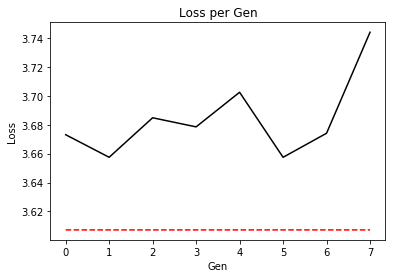

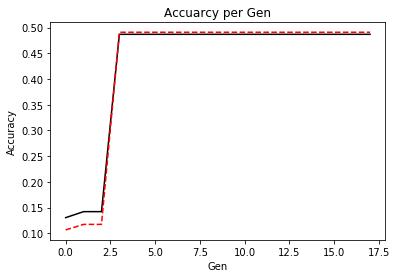

In [541]:
plt.plot(train_loss_hist[10:40], 'k-', label='Train Loss')
plt.plot(test_loss_hist[10:40], 'r--', label='Test Loss')
plt.title('Loss per Gen')
plt.xlabel('Gen')
plt.ylabel('Loss')
plt.show()


#plotting accuracy
plt.plot(train_acc, 'k-', label='Train acc')
plt.plot(test_acc, 'r--', label='Test acc')
plt.title('Accuarcy per Gen')
plt.xlabel('Gen')
plt.ylabel('Accuracy')
plt.show()
